In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Read the CSV into a pandas dataframe
df = pd.read_csv('c://Users//fhd330//Pictures//LoanData.csv', index_col=None)

In [3]:
#verify the data
df.shape

(10027, 21)

In [4]:
df.columns

Index([u'Loan Amount', u'Funded Amount', u'Loan Term', u'Interest Rate', u'Loan Grade', u'Loan SubGrade', u'Employee Title', u'Employemen Length', u'Annual Income', u'Verification Status', u'Loan Issued Date', u'Loan Status', u'Loan Purpose', u'Title', u'Address State', u'Month since last Delinquency', u'Outstanding Principal', u'Total Payment', u'Total Recvd Principal', u'Total Recvd Interest', u'Total Recvd Late fees'], dtype='object')

In [5]:
# top 5 rows
df.head()

,Loan Amount,Funded Amount,Loan Term,Interest Rate,Loan Grade,Loan SubGrade,Employee Title,Employemen Length,Annual Income,Verification Status,Loan Issued Date,Loan Status,Loan Purpose,Title,Address State,Month since last Delinquency,Outstanding Principal,Total Payment,Total Recvd Principal,Total Recvd Interest,Total Recvd Late fees
0,2500,2500,60 months,15.27%,C,C4,Ryder,< 1 year,30000.0,Source Verified,11-Dec,Charged Off,car,bike,GA,NaN,0,1014.53,456.46,435.17,0.0
1,5600,5600,60 months,21.28%,F,F2,NaN,4 years,40000.0,Source Verified,11-Dec,Charged Off,small_business,Expand Business & Buy Debt Portfolio,CA,NaN,0,647.50,162.02,294.94,0.0
2,5375,5375,60 months,12.69%,B,B5,Starbucks,< 1 year,15000.0,Verified,11-Dec,Charged Off,other,Building my credit history.,TX,NaN,0,1484.59,673.48,533.42,0.0
3,9000,9000,36 months,13.49%,C,C1,Va. Dept of Conservation/Recreation,< 1 year,30000.0,Source Verified,11-Dec,Charged Off,debt_consolidation,freedom,VA,NaN,0,2277.32,1256.14,570.26,0.0
4,10000,10000,36 months,10.65%,B,B2,SFMTA,3 years,100000.0,Source Verified,11-Dec,Charged Off,other,Other Loan,CA,NaN,0,7471.99,5433.47,1393.42,0.0


In [6]:
#check the number of missing values in the data
df.isnull().sum()

Loan Amount                        0
Funded Amount                      0
Loan Term                          0
Interest Rate                      0
Loan Grade                         0
Loan SubGrade                      0
Employee Title                   729
Employemen Length                  0
Annual Income                      0
Verification Status                0
Loan Issued Date                   0
Loan Status                        0
Loan Purpose                       0
Title                              0
Address State                      0
Month since last Delinquency    6725
Outstanding Principal              0
Total Payment                      0
Total Recvd Principal              0
Total Recvd Interest               0
Total Recvd Late fees              0
dtype: int64

In [7]:
# quick description of numericle values in the data
df.describe()

,Loan Amount,Funded Amount,Annual Income,Month since last Delinquency,Outstanding Principal,Total Payment,Total Recvd Principal,Total Recvd Interest,Total Recvd Late fees
count,10027.000000,10027.000000,1.002700e+04,3302.000000,10027.0,10027.000000,10027.000000,10027.000000,10027.000000
mean,12810.187494,12634.501845,6.808445e+04,37.324046,0.0,12746.584869,9662.374223,2817.242303,1.665958
std,8472.265454,8273.832939,4.865705e+04,21.421714,0.0,10608.584612,8158.253608,3284.119921,7.954185
min,1000.000000,1000.000000,6.000000e+03,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,6000.000000,6000.000000,4.080450e+04,NaN,0.0,4940.450000,3300.000000,711.955000,0.000000
50%,11000.000000,11000.000000,5.900000e+04,NaN,0.0,9720.494844,7250.000000,1574.800000,0.000000
75%,17400.000000,17000.000000,8.100000e+04,NaN,0.0,17411.836095,14000.000000,3626.485000,0.000000
max,35000.000000,35000.000000,1.782000e+06,86.000000,0.0,58886.473430,35000.010000,23886.470000,180.200000


### Lets understand the data more

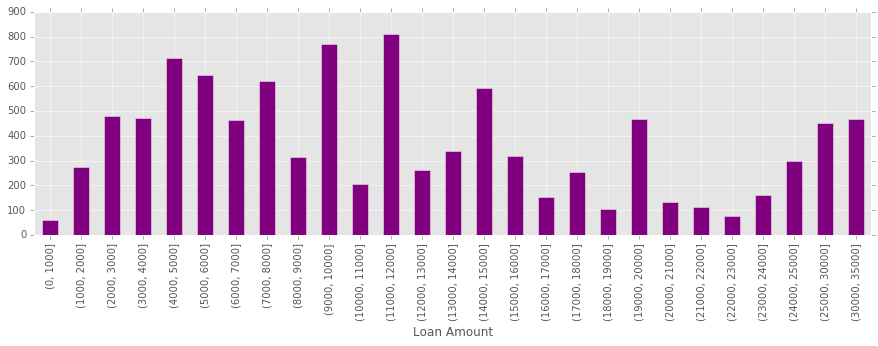

In [8]:
bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000,21000,22000,23000,24000,25000,30000,35000]
loanamount = df.groupby(pd.cut(df['Loan Amount'], bins=bins))['Loan Amount'].count()
loanamount.plot(kind='bar', figsize=(15,4), color='purple')

##### Highest number of loans are in 9k to 10k and 11k to 12k loan amounts

###### Lets profile the data based on the following borrower attributes  
'Employee Title', 'Employemen Length', 'Annual Income', 'Address State'

In [9]:
df.groupby('Employee Title').size().order(ascending=False).reset_index().head(10)

,Employee Title,0
0,US Army,36
1,Bank of America,34
2,Kaiser Permanente,22
3,Walmart,20
4,UPS,19
5,IBM,18
6,AT&T,17
7,US Navy,14
8,USAF,14
9,Walgreens,13


#### Above are the top 10 Employee Ttiles across the Loan portfolio

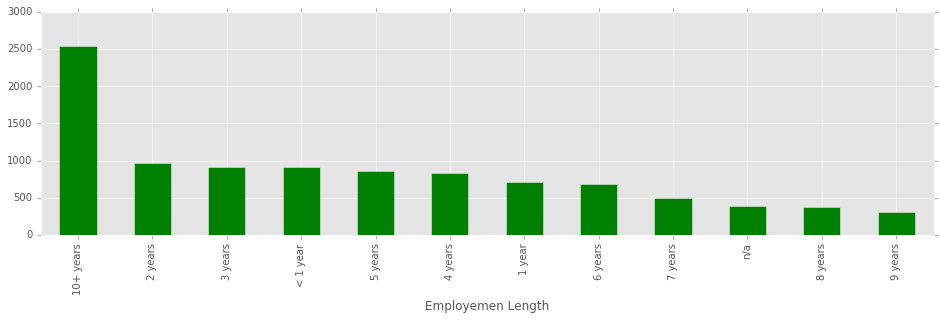

In [10]:
df.groupby('Employemen Length').size().order(ascending=False).plot(kind="bar", figsize=(16,4),stacked=False,ylim = [0,3000], color='green')

##### Majority of the borrowers have more than 10 years  of employement length

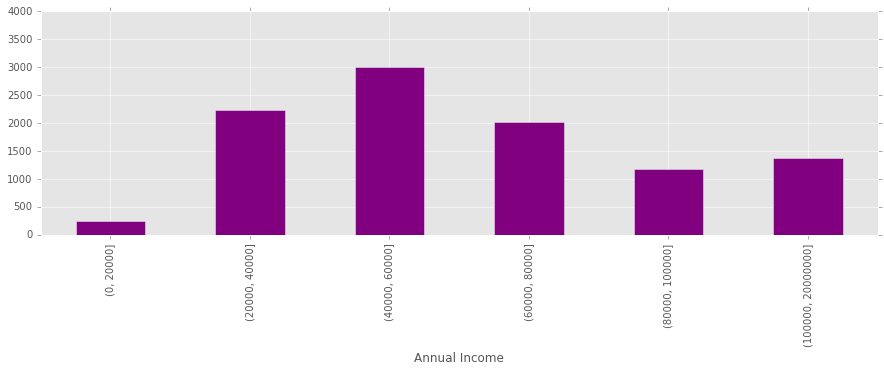

In [11]:
bins = [0,20000, 40000,60000,80000, 100000,20000000]
loanamount = df.groupby(pd.cut(df['Annual Income'], bins=bins))['Annual Income'].count()
loanamount.plot(kind='bar', figsize=(15,4), color='purple', ylim= [0,4000])

#### Majority of the borrowers have Annual Income in range of 40K to 60K

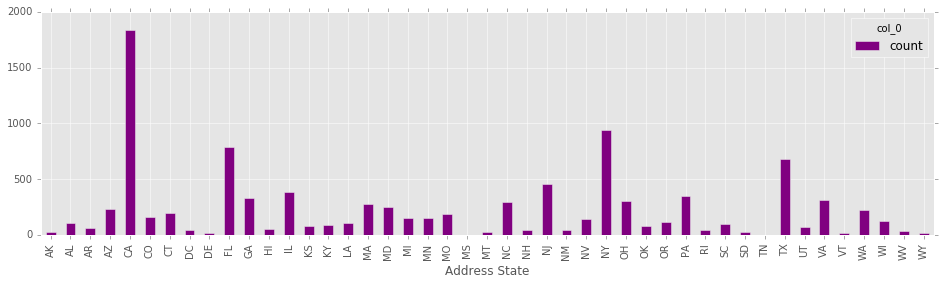

In [12]:
pd.crosstab(index=[df['Address State']],columns="count").plot(kind="bar", figsize=(16,4),stacked=False,ylim = [0,2000], color='purple')

#### California, New york, Florida, and Texas have majority of the loans

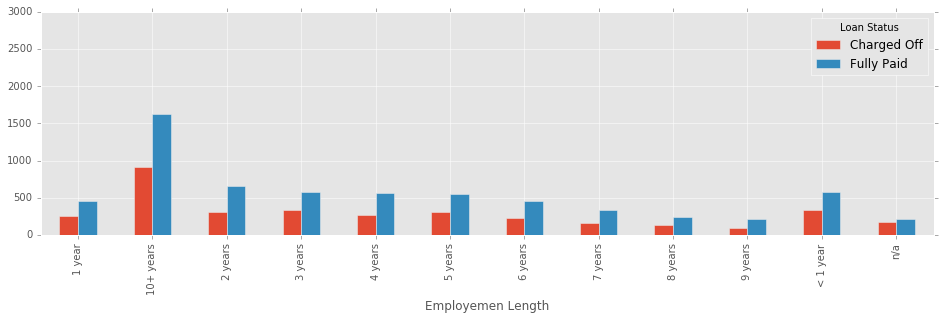

In [13]:
pd.crosstab(index=[df['Employemen Length']],columns=df['Loan Status']).plot(kind="bar", figsize=(16,4),stacked=False,ylim = [0,3000])

In [14]:
pd.pivot_table(df, index=['Address State'], values=['Annual Income']).reset_index().sort(['Annual Income'], ascending=False).head()

,Address State,Annual Income
36,TN,120000.000000
21,MS,106870.000000
6,CT,78704.230553
8,DE,78534.272727
24,NH,76701.263415


##### Above are the top 5 states with highest Mean Borrower Annual Income

In [15]:
pd.pivot_table(df, index=['Employee Title'], values=['Annual Income']).reset_index().sort(['Annual Income'], ascending=False).head()

,Employee Title,Annual Income
4278,NYCDOE,1782000.0
5007,RBS Securities,750000.0
6073,The Ayco Company,725000.0
5850,Stryker Instruments,686998.0
6133,The Mayo Clinic,543000.0


#### Of the borrowers, above Employment Areas have the highest Annual Income

### Lets find out the Insights about Charged Off Loans

In [16]:
pd.crosstab(columns=df['Loan Issued Date'],index=[df['Loan Status']])

Loan Issued Date,10-Dec,10-Nov,11-Apr,11-Aug,11-Dec,11-Feb,11-Jan,11-Jul,11-Jun,11-Mar,11-May,11-Nov,11-Oct,11-Sep
Loan Status,,,,,,,,,,,,,,
Charged Off,143,84,222,271,431,169,186,282,271,210,290,344,313,308
Fully Paid,0,0,0,0,1836,0,0,0,0,0,0,1888,1805,974


###### All the Loans before September 2011 have resulted in Charged Off

In [17]:
# Removing % from the column to make the column a Float type for further numerical analysis 
df['Interest Rate'] = df['Interest Rate'].apply(lambda x:x.split('%')[0])
df['Interest Rate'] = df['Interest Rate'].astype(float)

In [18]:
# creating a new column f/i Ratio
df['f/i Ratio'] = df['Funded Amount']/df['Annual Income']

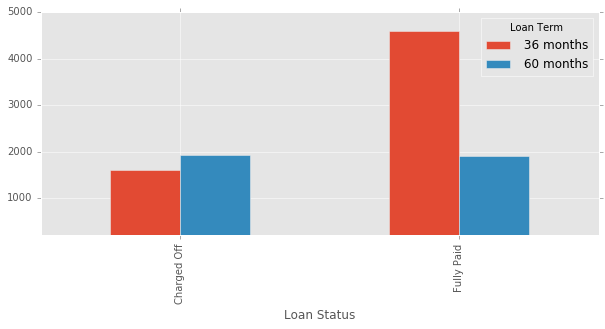

In [19]:
loan_terms = pd.crosstab(index=df['Loan Status'],columns=[df['Loan Term']])
loan_terms.plot(kind="bar", figsize=(10,4),stacked=False, ylim = [200, 5000])

##### From the above we can conclude that Longer Loan terms are more probable to be charged off
##### And Shorter loans have the high probability of good payment

In [20]:
pd.pivot_table(df, index=['Loan Status' ], aggfunc='mean', values=['f/i Ratio'])

,f/i Ratio
Loan Status,
Charged Off,0.224375
Fully Paid,0.201627


#### Loans with more Funding to Annual Income ratio are more probable to Charged Off but not so significantly

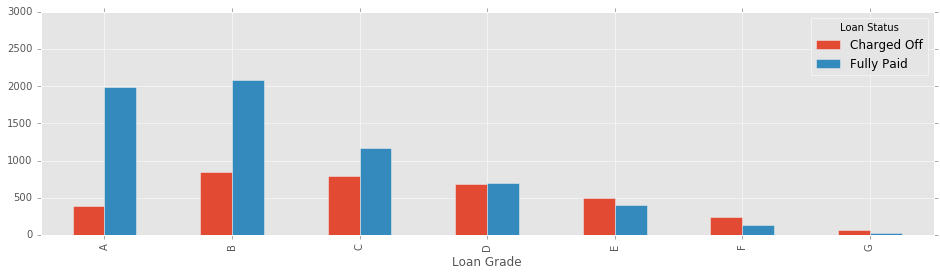

In [21]:
pd.crosstab(index=[df['Loan Grade']],columns=df['Loan Status']).plot(kind="bar", figsize=(16,4),stacked=False,ylim = [0,3000])

#### Loan Grade types E,F,G have more Charged off Loans compared to Fully Paid

In [25]:
# Get only the Charged off accounts
chargedoff = df[df['Loan Status']=='Charged Off']
pd.pivot_table(chargedoff, index=['Loan Grade'], aggfunc='mean', values=['Loan Amount','f/i Ratio', 'Interest Rate'])

,Interest Rate,Loan Amount,f/i Ratio
Loan Grade,,,
A,7.368015,7865.712468,0.168963
B,11.111129,10952.794118,0.211986
C,13.916865,11969.321066,0.218360
D,16.451535,13332.711988,0.231575
E,18.401437,17240.536437,0.255727
F,20.533182,20419.008264,0.276296
G,21.913288,19957.876712,0.280150


#### From the above table we can conclude that , Loans in Grade 'D,'E','F','G' are more probale to be Charged Off
###### as they have more "f/i ratio" i.e funded amount to Income ratio. 

In [26]:
# lets Create a new column "Chg off/Paid"
chargeoff_paid = pd.crosstab(index=[df['Loan Grade'],df['Loan SubGrade']],columns=[df['Loan Status']]).reset_index()
chargeoff_paid['Chg off/Paid'] = chargeoff_paid['Charged Off']/ chargeoff_paid['Fully Paid']
chargeoff_paid[chargeoff_paid['Chg off/Paid']>1].sort(['Chg off/Paid'], ascending=False)

Loan Status,Loan Grade,Loan SubGrade,Charged Off,Fully Paid,Chg off/Paid
31,G,G2,23,4,5.750000
29,F,F5,45,13,3.461538
32,G,G3,11,5,2.200000
30,G,G1,26,12,2.166667
26,F,F2,50,24,2.083333
34,G,G5,4,2,2.000000
25,F,F1,74,42,1.761905
28,F,F4,40,25,1.600000
24,E,E5,81,58,1.396552
23,E,E4,82,59,1.389831


#### Ratio of Charged Off to Full Paid
Ratio greater than 1 means more number of Charged Off loans compared to Fully paid loans. 
Aim is to reduce the loans which fall into the above category.

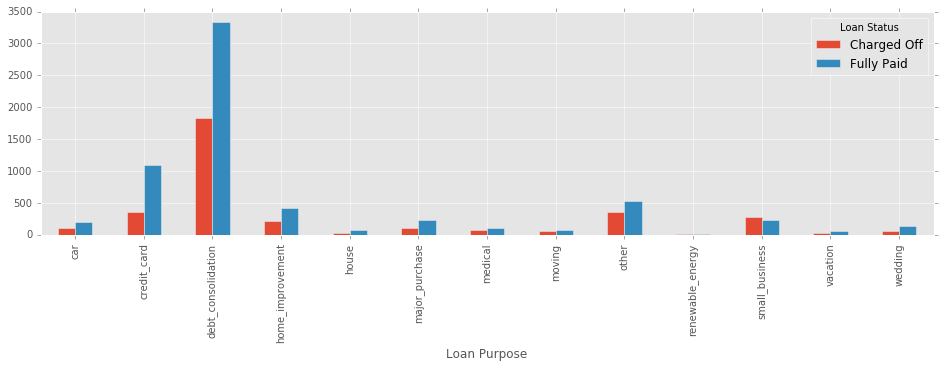

In [27]:
pd.crosstab(index=[df['Loan Purpose']],columns=[df['Loan Status']]).plot(kind="bar", figsize=(16,4),stacked=False,ylim = [0,3500])

##### Loans taken with the purpose of "Small Business" have resulted in more number of Charged Off Loans
###### Also Loans with the purpose of 'moving', 'renewable_energy' have high percentage of Charged off Loans

##### Lets dig into the above three loan purpose categories and see whether there are any patterns

In [28]:
small_mov_ren = df[(df['Loan Purpose']=='small_business') | (df['Loan Purpose']=='moving') | (df['Loan Purpose']=='renewable_energy')]
pd.crosstab(index=[small_mov_ren['Loan Purpose'], small_mov_ren['Loan Status']],columns=[small_mov_ren['Loan Grade']])

Loan Grade                     A   B   C   D   E   F   G
Loan Purpose     Loan Status                            
moving           Charged Off  12  23  12   8   6   1   1
                 Fully Paid   26  22  13   6   1   1   0
renewable_energy Charged Off   3   2   3   0   0   1   1
                 Fully Paid    8   4   0   1   0   0   0
small_business   Charged Off  30  70  55  56  34  26  11
                 Fully Paid   78  67  43  23  12   9   1

#### From the above, it is clear that all the Loan Grade types mentioned below have high number of Charged Off Loans
###### In the "small Business", all types except Loan Grade 'A' 
###### In the "moving", Loan Grade 'B', 'D', 'E','G'
###### In the "renewable_energy", Grade 'C', 'F', 'G'

In [29]:
pd.crosstab(index=df['Loan Status'],columns=[df['Employemen Length']])

Employemen Length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,n/a
Loan Status,,,,,,,,,,,,
Charged Off,255,910,309,336,274,309,224,167,136,93,342,169
Fully Paid,464,1632,659,583,560,558,458,335,245,217,573,219


In [30]:
pd.crosstab(index=[df['Employemen Length'],df['Loan Status']],columns=[df['Verification Status']])

Verification Status            Not Verified  Source Verified  Verified
Employemen Length Loan Status                                         
1 year            Charged Off            88               89        78
                  Fully Paid            177              138       149
10+ years         Charged Off           210              233       467
                  Fully Paid            448              435       749
2 years           Charged Off            93              114       102
                  Fully Paid            227              201       231
3 years           Charged Off            99              131       106
                  Fully Paid            215              173       195
4 years           Charged Off            75               84       115
                  Fully Paid            196              155       209
5 years           Charged Off           100               98       111
                  Fully Paid            203              159       196
6 years           Charged Off            63               68        93
                  Fully Paid            150              131       177
7 years           Charged Off            46               48        73
                  Fully Paid            118               93       124
8 years           Charged Off            39               32        65
                  Fully Paid             83               60       102
9 years           Charged Off            30               36        27
                  Fully Paid             72               56        89
< 1 year          Charged Off            69              159       114
                  Fully Paid             85              325       163
n/a               Charged Off            49               33        87
                  Fully Paid             46               50       123

##### From the above two code snippets, Surprisingly Employemen Length and Verification Status are not valuable indicators for Loans being Charged Off. Observed random behaviour

In [31]:
#Lets look at Charged Offs by States
states = pd.crosstab(index=df['Address State'],columns=[df['Loan Status']]).reset_index()
states['Chg off/Paid'] = states['Charged Off']/ states['Fully Paid']
states.sort(['Chg off/Paid'], ascending=False).head()

Loan Status,Address State,Charged Off,Fully Paid,Chg off/Paid
27,NV,70,77,0.909091
0,AK,12,15,0.800000
26,NM,20,26,0.769231
18,MI,67,88,0.761364
17,MD,104,145,0.717241


##### The above states have resulted in high percentage of Charged Off Loans compared to Fully Paid loans
###### Refer to Graph below for all the states

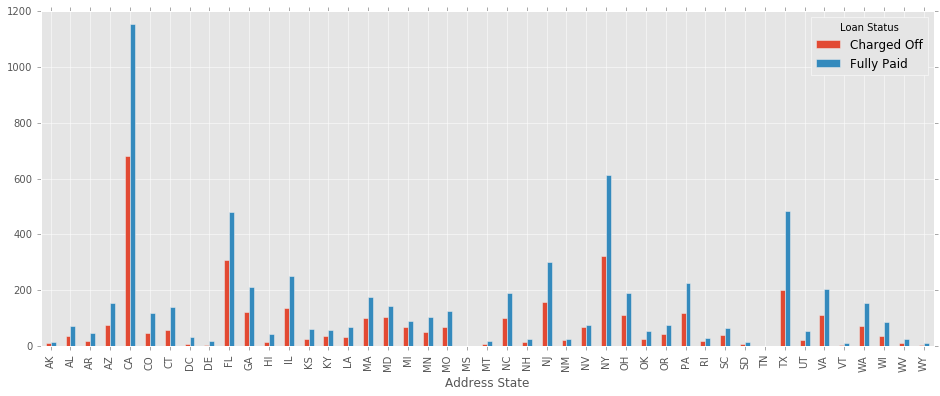

In [33]:
pd.crosstab(index=[df['Address State']],columns=df['Loan Status']).plot(kind="bar", figsize=(16,6),stacked=False,ylim = [0,1200])